(512, 512) 3810 -2000
<class 'numpy.ndarray'>
int16
(512, 512)
<class 'numpy.ndarray'>
Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 188
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.840.4267.32.211576712236724591876051441256014721349
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0018) SOP Instance UID                    UI: ID_0a0f3abd0
(0008, 0060) Modality                            CS: 'CT'
(0010, 0020) Patient ID                          LO: 'ID_9eb2472f'
(0020, 000d) Study Instance UID                  UI: ID_3b482a7d32
(0020, 000e) Series Instance UID  

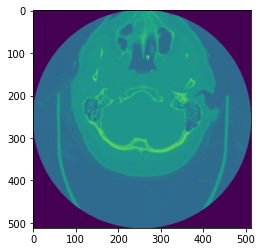

(512, 512) 3810 -2000
<class 'numpy.ndarray'>
int16
(512, 512)


In [76]:
import pydicom as dicom
import matplotlib.pyplot as plt
import cv2


ds = dicom.dcmread('TrainingData\healthy\ID_0a0f3abd0.dcm')
pixel_array_numpy = ds.pixel_array
pixel_array_numpy0 = cv2.flip(pixel_array_numpy,1)
###pixel_array_numpy0.tofile('output.dcm')
print(pixel_array_numpy.shape,pixel_array_numpy.max(),pixel_array_numpy.min())
print(type(pixel_array_numpy))
print(pixel_array_numpy.dtype)
print(pixel_array_numpy.shape)
print(type(pixel_array_numpy))
print(ds)

plt.imshow(pixel_array_numpy)
plt.show()



print(pixel_array_numpy0.shape,pixel_array_numpy0.max(),pixel_array_numpy0.min())
print(type(pixel_array_numpy0))
print(pixel_array_numpy0.dtype)
print(pixel_array_numpy0.shape)



In [57]:
from torch.utils.data.dataset import Dataset
from torchvision import transforms
import pydicom as dicom
import matplotlib.pylab as plt
import os
import numpy as np
from sklearn.model_selection import train_test_split
import cv2
import torch


def load_images_from_folder(folder,catagory_input):
    images = []
    catagory=[]
    catagory_onehot = [0,0,0,0,0,0]
    catagory_onehot[catagory_input] = 1
    for filename in os.listdir(folder):
        
        ds = dicom.dcmread(os.path.join(folder,filename))
        pixel_array_numpy = ds.pixel_array

        pixel_array_numpy = cv2.resize(pixel_array_numpy, dsize=(512, 512), interpolation=cv2.INTER_CUBIC)
        
        
        if pixel_array_numpy is not None:
#             pixel_array_numpy = pixel_array_numpy.clip(min=0)
            images.append(pixel_array_numpy)
            catagory.append(catagory_input)
            
            pixel_array_numpy_inverse = cv2.flip(pixel_array_numpy,1)
            images.append(pixel_array_numpy_inverse)
            catagory.append(catagory_input)
            
            pixel_array_numpy_upsidedown = cv2.flip(pixel_array_numpy,0)
            images.append(pixel_array_numpy_upsidedown)
            catagory.append(catagory_input)
            
            pixel_array_numpy_turn = cv2.flip(pixel_array_numpy,-1)
            images.append(pixel_array_numpy_turn)
            catagory.append(catagory_input)
            
            img_rotate_90_clockwise = cv2.rotate(pixel_array_numpy, cv2.ROTATE_90_CLOCKWISE)
            images.append(img_rotate_90_clockwise)
            catagory.append(catagory_input)
            
            img_rotate_90_counterclockwise = cv2.rotate(pixel_array_numpy, cv2.ROTATE_90_COUNTERCLOCKWISE)
            images.append(img_rotate_90_counterclockwise)
            catagory.append(catagory_input)
            
    images = np.array(images)
    catagory = np.array(catagory)


    y=np.zeros([len(images),images[0].shape[0],images[0].shape[1]],dtype=np.uint8)
    C=np.zeros([len(catagory)],dtype=np.uint8)



    for i in range(len(images)):
#         print(C,catagory[i])

        y[i,:,:] = images[i]
        C[i] = catagory[i]

    return y, C


transform = transforms.Compose([
    transforms.ToTensor(),                                 
    transforms.Normalize((0.5), (0.5))])
main_folder = 'TrainingData\\'
folder_name = ['epidural',
                    'healthy',
                    'intraparenchymal',
                    'intraventricular',
                    'subarachnoid',
                    'subdural']
folder_dictionary = {"epidural":0,
                     "healthy":1,
                     "intraparenchymal":2,
                     "intraventricular":3,
                     "subarachnoid":4,
                     "subdural":5}

image = []
catagory = []
count = 0
for f_name in folder_name:
    print(f_name)
    tmp_path = main_folder+f_name
    train_tmp,catagory_tmp=load_images_from_folder(tmp_path,folder_dictionary[f_name])
    image.append(train_tmp)
    catagory.append(catagory_tmp)

image = np.array(image)
catagory = np.array(catagory)


image = image.reshape((-1, 512,512))
catagory = catagory.reshape((-1))

print(image)
print(catagory)

        # stuff

class MyCustomDataset(Dataset):
    def __init__(self,image,catagory):
        self.image = image
        self.catagory = catagory
        self.count = len(catagory)
        
    def __getitem__(self, index):
        # stuff
        image_tmp = transform(self.image[index])  
        return (image_tmp, self.catagory[index])

    def __len__(self):
        return self.count 
    

X_train, X_test, y_train, y_test = train_test_split(image, catagory, test_size=0.2, random_state=42) 

train_custom_dataset = MyCustomDataset(X_train,y_train)
test_custom_dataset = MyCustomDataset(X_test,y_test)

epidural
healthy
intraparenchymal
intraventricular
subarachnoid
subdural
[[[ 48  48  48 ...  48  48  48]
  [ 48  48  48 ...  48  48  48]
  [ 48  48  48 ...  48  48  48]
  ...
  [ 48  48  48 ...  48  48  48]
  [ 48  48  48 ...  48  48  48]
  [ 48  48  48 ...  48  48  48]]

 [[ 48  48  48 ...  48  48  48]
  [ 48  48  48 ...  48  48  48]
  [ 48  48  48 ...  48  48  48]
  ...
  [ 48  48  48 ...  48  48  48]
  [ 48  48  48 ...  48  48  48]
  [ 48  48  48 ...  48  48  48]]

 [[ 48  48  48 ...  48  48  48]
  [ 48  48  48 ...  48  48  48]
  [ 48  48  48 ...  48  48  48]
  ...
  [ 48  48  48 ...  48  48  48]
  [ 48  48  48 ...  48  48  48]
  [ 48  48  48 ...  48  48  48]]

 ...

 [[ 55  55  54 ... 137 214  25]
  [ 56  57  55 ... 168 252  79]
  [ 57  55  54 ... 215  33 113]
  ...
  [ 20  20  21 ...  24  25  24]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]]

 [[ 25  79 113 ...  24   0   0]
  [214 252  33 ...  25   0   0]
  [137 168 215 ...  24   0   0]
  ...
  [ 54  55  54 ... 

In [58]:
print(train_custom_dataset.__getitem__(5))
print(test_custom_dataset.__getitem__(1))

(tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]]]), 3)
(tensor([[[-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         ...,
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.],
         [-1., -1., -1.,  ..., -1., -1., -1.]]]), 3)


In [59]:
print(train_custom_dataset.__len__())
print(test_custom_dataset.__len__())

28800
7200


In [60]:

train_dataset_loader = torch.utils.data.DataLoader(dataset=train_custom_dataset,
                                                    batch_size=64,
                                                    shuffle=True)
test_dataset_loader = torch.utils.data.DataLoader(dataset=test_custom_dataset,
                                                    batch_size=64,
                                                    shuffle=True)

In [61]:
# for images, labels in train_dataset_loader:
#     print(images,labels)
import torch.nn as nn
import torch.nn.functional as F

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")


print(device)
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 3,stride = 1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 3,stride = 1)
        self.conv3 = nn.Conv2d(16, 32, 3,stride = 1)
        self.conv4 = nn.Conv2d(32, 64, 3,stride = 1)
        self.conv5 = nn.Conv2d(64, 128, 3,stride = 1)
        #self.fc1 = nn.Linear(32* 62* 62, 1000)
        #self.fc1 = nn.Linear(64*30*30, 1000)
        self.fc1 = nn.Linear(128*14*14, 1000)
        self.fc2 = nn.Linear(1000, 500)
        self.fc3 = nn.Linear(500, 6)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        x = self.pool(F.relu(self.conv4(x)))
        x = self.pool(F.relu(self.conv5(x)))
        #print(x.shape)
        
        #x = x.view(-1, 32* 62* 62)
        #x = x.view(-1, 64* 30* 30)
        x = x.view(-1, 128* 14* 14)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        
        return x

net = Net()
net.to(device)

cuda:0


Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (conv5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=25088, out_features=1000, bias=True)
  (fc2): Linear(in_features=1000, out_features=500, bias=True)
  (fc3): Linear(in_features=500, out_features=6, bias=True)
)

In [62]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.005, momentum=0.9)

In [64]:
for epoch in range(15):  # loop over the dataset multiple times

    running_loss = 0.0

    for i, data in enumerate(train_dataset_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data[0].to(device), data[1].to(device)
#         print(inputs, )
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        #print(outputs,labels)
        loss = criterion(outputs, labels.long())
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 20 == 19:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 20))
            running_loss = 0.0

print('Finished Training')

[1,    20] loss: 1.792
[1,    40] loss: 1.792
[1,    60] loss: 1.792
[1,    80] loss: 1.793
[1,   100] loss: 1.791
[1,   120] loss: 1.792
[1,   140] loss: 1.789
[1,   160] loss: 1.791
[1,   180] loss: 1.790
[1,   200] loss: 1.788
[1,   220] loss: 1.788
[1,   240] loss: 1.784
[1,   260] loss: 1.783
[1,   280] loss: 1.778
[1,   300] loss: 1.768
[1,   320] loss: 1.763
[1,   340] loss: 1.735
[1,   360] loss: 1.743
[1,   380] loss: 1.750
[1,   400] loss: 1.733
[1,   420] loss: 1.724
[1,   440] loss: 1.720
[2,    20] loss: 1.709
[2,    40] loss: 1.702
[2,    60] loss: 1.687
[2,    80] loss: 1.707
[2,   100] loss: 1.688
[2,   120] loss: 1.701
[2,   140] loss: 1.683
[2,   160] loss: 1.681
[2,   180] loss: 1.682
[2,   200] loss: 1.662
[2,   220] loss: 1.664
[2,   240] loss: 1.675
[2,   260] loss: 1.679
[2,   280] loss: 1.686
[2,   300] loss: 1.639
[2,   320] loss: 1.667
[2,   340] loss: 1.668
[2,   360] loss: 1.675
[2,   380] loss: 1.677
[2,   400] loss: 1.677
[2,   420] loss: 1.645
[2,   440] 

In [65]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

In [66]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_dataset_loader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
#         print(predicted)
#         _, true_label = torch.max(labels.data, 1)
#         print(true_label)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 46 %


In [67]:
def test_images_from_folder(folder):
    images = []
    file_name = []
    for filename in os.listdir(folder):
        
        ds = dicom.dcmread(os.path.join(folder,filename))
        pixel_array_numpy = ds.pixel_array

        pixel_array_numpy = cv2.resize(pixel_array_numpy, dsize=(512, 512), interpolation=cv2.INTER_CUBIC)
        
        
        if pixel_array_numpy is not None:
#             pixel_array_numpy = pixel_array_numpy.clip(min=0)
            images.append(pixel_array_numpy)
            file_name.append(filename)
            

    images = np.array(images)

    y=np.zeros([len(images),images[0].shape[0],images[0].shape[1]],dtype=np.uint8)

    for i in range(len(images)):

        y[i,:,:] = images[i]

    return y,file_name




transform = transforms.Compose([
    transforms.ToTensor(),                                 
    transforms.Normalize((0.5), (0.5))])

main_folder = 'TestingData\\'


image = []
count = 0

tmp_path = main_folder
train_tmp,file_name =test_images_from_folder(tmp_path)
image.append(train_tmp)


image = np.array(image)
image = image.reshape((-1, 512,512))


print(image.shape)
print(len(file_name))



class testDataset(Dataset):
    def __init__(self,image,file_name):
        self.image = image
        self.file_name = file_name
        self.count = len(image)
        
    def __getitem__(self, index):
        # stuff
        image_tmp = transform(self.image[index])  
        return (image_tmp,self.file_name[index])

    def __len__(self):
        return self.count 
    

# X_train, X_test, y_train, y_test = train_test_split(image, catagory, test_size=0.2, random_state=42) 

TEST_custom_dataset = testDataset(image,file_name)
print(TEST_custom_dataset.__len__())
TEST_dataset_loader = torch.utils.data.DataLoader(dataset=TEST_custom_dataset,
                                                    batch_size=1,
                                                    shuffle=False)

(600, 512, 512)
600
600


In [72]:
from openpyxl import Workbook
wb = Workbook()
ws = wb.active
 

correct = 0
total = 0
TEST_folder_dictionary = {0:"epidural",
                     1:"healthy",
                     2:"intraparenchymal",
                     3:"intraventricular",
                     4:"subarachnoid",
                     5:"subdural"}
with torch.no_grad():
    for data in TEST_dataset_loader:
#         images= data.to(device)

        images, file_name = data[0].to(device), data[1]
#         print(images.shape)
        outputs = net(images)
        
        _, predicted = torch.max(outputs.data, 1)
        print(file_name[0], TEST_folder_dictionary[predicted.tolist()[0]])
        ws.append([file_name[0],TEST_folder_dictionary[predicted.tolist()[0]]])
        
wb.save('TEST_data.xlsx')


Test_001.dcm intraparenchymal
Test_002.dcm subdural
Test_003.dcm subdural
Test_004.dcm healthy
Test_005.dcm intraventricular
Test_006.dcm intraparenchymal
Test_007.dcm epidural
Test_008.dcm epidural
Test_009.dcm subarachnoid
Test_010.dcm intraparenchymal
Test_011.dcm epidural
Test_012.dcm healthy
Test_013.dcm subdural
Test_014.dcm intraventricular
Test_015.dcm intraparenchymal
Test_016.dcm subarachnoid
Test_017.dcm subarachnoid
Test_018.dcm subdural
Test_019.dcm subdural
Test_020.dcm epidural
Test_021.dcm intraparenchymal
Test_022.dcm epidural
Test_023.dcm intraparenchymal
Test_024.dcm subarachnoid
Test_025.dcm subdural
Test_026.dcm epidural
Test_027.dcm epidural
Test_028.dcm intraventricular
Test_029.dcm epidural
Test_030.dcm subdural
Test_031.dcm intraparenchymal
Test_032.dcm epidural
Test_033.dcm healthy
Test_034.dcm intraparenchymal
Test_035.dcm subdural
Test_036.dcm subarachnoid
Test_037.dcm epidural
Test_038.dcm epidural
Test_039.dcm intraventricular
Test_040.dcm subarachnoid
Tes

Test_356.dcm healthy
Test_357.dcm intraparenchymal
Test_358.dcm epidural
Test_359.dcm intraventricular
Test_360.dcm intraparenchymal
Test_361.dcm epidural
Test_362.dcm subdural
Test_363.dcm intraparenchymal
Test_364.dcm subarachnoid
Test_365.dcm epidural
Test_366.dcm subarachnoid
Test_367.dcm intraventricular
Test_368.dcm intraparenchymal
Test_369.dcm subarachnoid
Test_370.dcm intraventricular
Test_371.dcm subarachnoid
Test_372.dcm intraparenchymal
Test_373.dcm subarachnoid
Test_374.dcm intraparenchymal
Test_375.dcm epidural
Test_376.dcm healthy
Test_377.dcm subarachnoid
Test_378.dcm epidural
Test_379.dcm epidural
Test_380.dcm subarachnoid
Test_381.dcm healthy
Test_382.dcm intraventricular
Test_383.dcm intraparenchymal
Test_384.dcm subarachnoid
Test_385.dcm intraparenchymal
Test_386.dcm epidural
Test_387.dcm subarachnoid
Test_388.dcm intraparenchymal
Test_389.dcm subarachnoid
Test_390.dcm epidural
Test_391.dcm intraventricular
Test_392.dcm intraparenchymal
Test_393.dcm epidural
Test_39